# Insurance Claims- Fraud Detection

Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, we are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, we will be working with some auto insurance data to demonstrate how we can create a predictive model that predicts if an insurance claim is fraudulent or not. 

Since we have to find whether insurance claim is fraudlent or not. Thiws is a classification type problem

 

feature_columns = 'months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', '_c39'


label= 'fraud_reported'

# Import Libraries

In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer
import joblib
import warnings
warnings.filterwarnings('ignore')

In [129]:
#loading the data
data=pd.read_csv("insurancefraud.csv")

In [130]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [131]:
# to show all columns
pd.set_option("display.max_columns",None)

In [132]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


we can see all the data here. It is mixed of continous and categorical column. we have to clean the data before use

In [133]:
data.shape

(1000, 40)

There are 1000 rows and 40 columns including Target variable (fraud_reported)

In [134]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

This are column available... fraud_reported is the target variable

In [135]:
data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

The dataset consists of int,object and float datatype. The object type data are categorical type . There is also date columns which should be encoded as day,month and year respectively

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Only _c39 has null values but we can find many ? in data which has to be removed. we can check whether we can drop _c39

Let us analyse each and every column

we have int and object datatypes. Label column that is fraud_reported is of object type which need to encoded using label encoder.

# EDA Process

In [137]:
#we have 2 columns of date policy_bind_date and incident_date


#changing Date to datetime format for policy bind_date
data['policy_bind_date']=pd.to_datetime(data['policy_bind_date'])
data["policy_bind_Month"]=data["policy_bind_date"].dt.month
data["policy_bind_Day"]=data["policy_bind_date"].dt.day
data["policy_bind_Year"]=data["policy_bind_date"].dt.year
data.drop('policy_bind_date',axis=1,inplace=True)

#changing Date to datetime format for incident_Date
data['incident_date']=pd.to_datetime(data['incident_date'])
data["incident_Month"]=data["incident_date"].dt.month
data["incident_Day"]=data["incident_date"].dt.day
data["incident_Year"]=data["incident_date"].dt.year
data.drop('incident_date',axis=1,inplace=True)

In [138]:
data.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,policy_bind_Month,policy_bind_Day,policy_bind_Year,incident_Month,incident_Day,incident_Year
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN,10,17,2014,1,25,2015
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN,6,27,2006,1,21,2015
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN,6,9,2000,2,22,2015
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN,5,25,1990,10,1,2015
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN,6,6,2014,2,17,2015


In [139]:
data['months_as_customer'].value_counts()

194    8
285    7
140    7
230    7
128    7
      ..
347    1
113    1
337    1
117    1
0      1
Name: months_as_customer, Length: 391, dtype: int64

In [140]:
data['age'].value_counts()

43    49
39    48
41    45
34    44
30    42
31    42
38    42
37    41
33    39
32    38
40    38
29    35
46    33
35    32
36    32
42    32
44    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
25    14
49    14
55    14
50    13
53    13
61    10
24    10
54    10
60     9
51     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
22     1
20     1
19     1
Name: age, dtype: int64

In [141]:
data['policy_number'].value_counts()

116735    1
107181    1
430794    1
115399    1
328387    1
         ..
218456    1
179538    1
357713    1
247116    1
296960    1
Name: policy_number, Length: 1000, dtype: int64

In [142]:
#This is a single type unique data. We can drop it as it is useless data
data.drop('policy_number',axis=1,inplace=True)

In [143]:
#exploring data columns of dataset
for i in data.columns:
    print(i)
    print(data[i].value_counts())
    print('\n')

months_as_customer
194    8
285    7
140    7
230    7
128    7
      ..
347    1
113    1
337    1
117    1
0      1
Name: months_as_customer, Length: 391, dtype: int64


age
43    49
39    48
41    45
34    44
30    42
31    42
38    42
37    41
33    39
32    38
40    38
29    35
46    33
35    32
36    32
42    32
44    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
25    14
49    14
55    14
50    13
53    13
61    10
24    10
54    10
60     9
51     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
22     1
20     1
19     1
Name: age, dtype: int64


policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


policy_csl
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


policy_deductable
1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64


policy_annual_premium
1374.22    2
1558.29    2
1389.13    2
1073.83    2
1074.07    2
          ..
1268.79    1
1558.86

In [144]:
#we can drop incident_year and _c39 as it is useless data as seen above
data.drop('incident_Year',axis=1,inplace=True)
data.drop('_c39',axis=1,inplace=True)

In [145]:
data.drop("incident_location",axis=1,inplace=True)

In [146]:
#we can see '?' in some of the data ccolumns such as collision_type,property_damage,police_report_available. we can replace it as unknown
data['collision_type'] = np.where(data['collision_type'] == "?", "Unknown", data['collision_type'])
data['property_damage'] = np.where(data['property_damage'] == "?", "Unknown", data['property_damage'])
data['police_report_available'] = np.where(data['collision_type'] == "?", "Unknown", data['police_report_available'])


In [147]:
data['umbrella_limit'] = np.where(data['umbrella_limit'] == "-1000000", "0", data['umbrella_limit'])

In [148]:
#Finding categorical value
column=[column for column in data.columns if data[column].dtype=='object']
column

['policy_state',
 'policy_csl',
 'umbrella_limit',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [149]:
#finding the continous value 
cont_col=[cont_col for cont_col in data.columns if data[cont_col].dtype!='object']
cont_col

['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year',
 'policy_bind_Month',
 'policy_bind_Day',
 'policy_bind_Year',
 'incident_Month',
 'incident_Day']

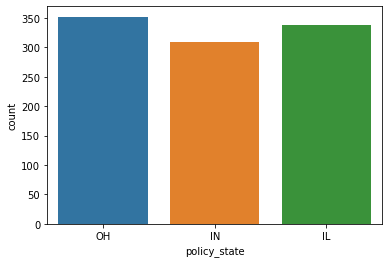

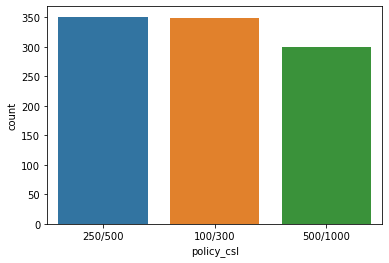

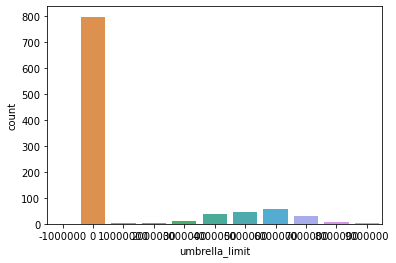

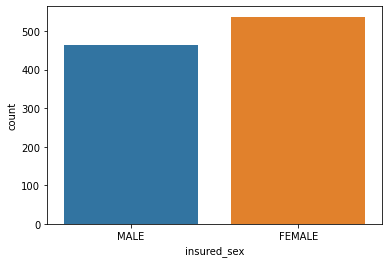

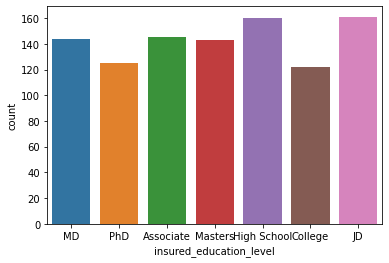

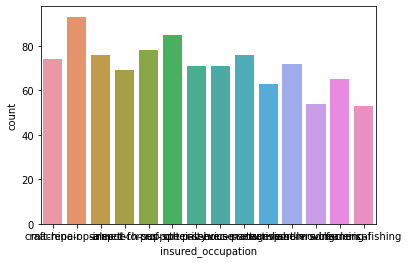

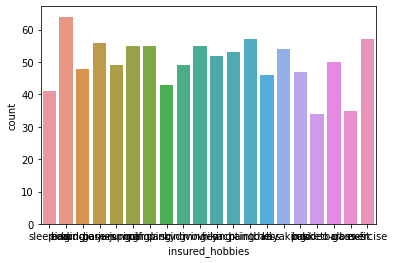

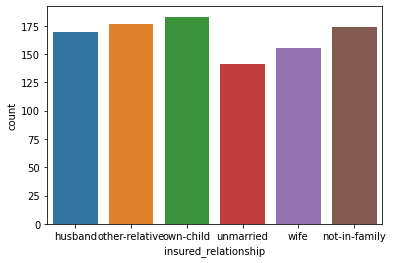

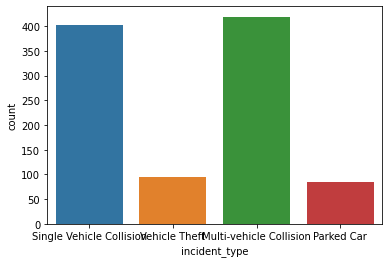

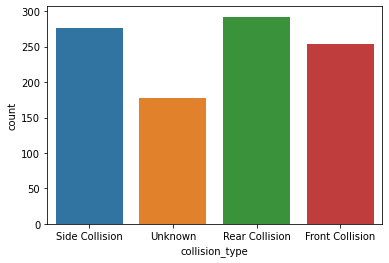

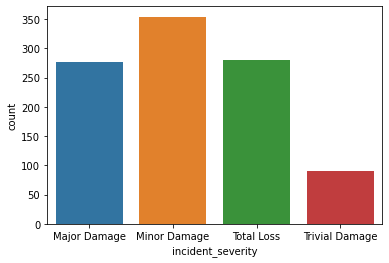

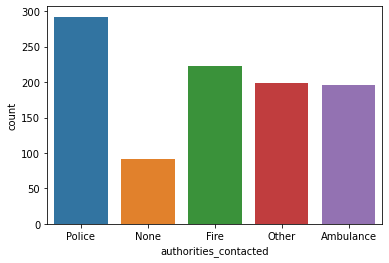

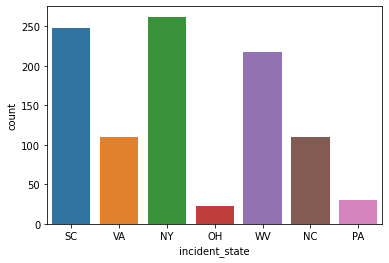

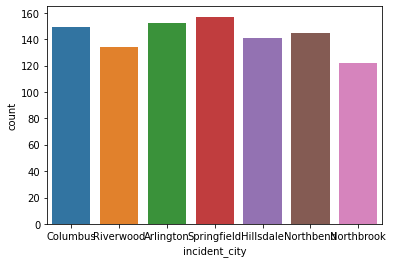

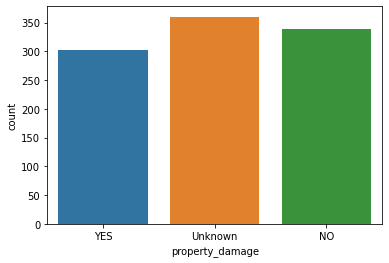

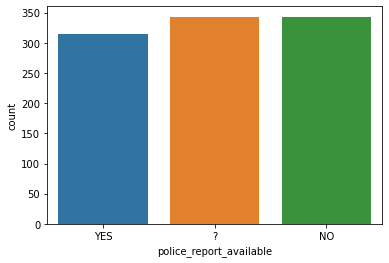

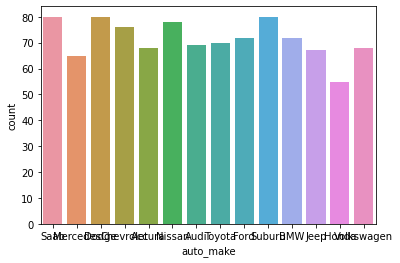

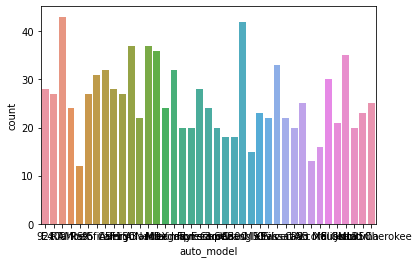

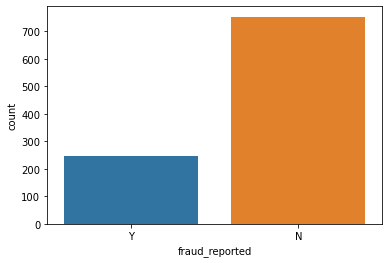

In [150]:
for i in column:
    plt.figure()
    sns.countplot(x=data[i])

we can see categorical data are cleaned. we have to encode it for further use

# Encoding data

In [151]:
#encoding Label using Label Encoder
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
data['fraud_reported']=LE.fit_transform(data['fraud_reported'])

In [152]:
#Encoding feature columns using Ordinal Encoder  
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
column=['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_type',
 'collision_type','incident_severity','authorities_contacted','incident_state','incident_city','property_damage','police_report_available','auto_make',
 'auto_model',]

for i in column:
    data[i]=OE.fit_transform(data[i].values.reshape(-1,1))

In [153]:
data.dtypes

months_as_customer               int64
age                              int64
policy_state                   float64
policy_csl                     float64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                  object
insured_zip                      int64
insured_sex                    float64
insured_education_level        float64
insured_occupation             float64
insured_hobbies                float64
insured_relationship           float64
capital-gains                    int64
capital-loss                     int64
incident_type                  float64
collision_type                 float64
incident_severity              float64
authorities_contacted          float64
incident_state                 float64
incident_city                  float64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                float64
bodily_injuries                  int64
witnesses                

we have now int and float data after encoding. we can move forward with this columns. Encoding is done succesfully using ordinal encoder

# Missing Values

In [154]:
data.isnull().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_cl

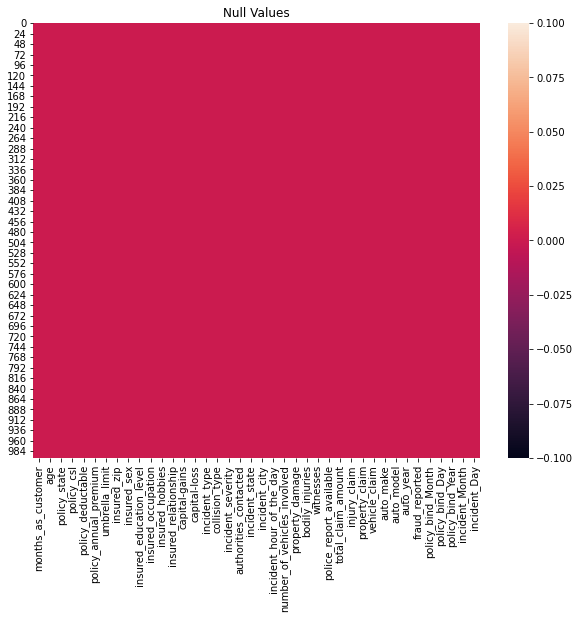

In [155]:
# heatmap on null values
plt.figure(figsize=[10,8])
sns.heatmap(data.isnull())
plt.title("Null Values")
plt.show()

There are no null/ missing values in the dataset

In [156]:
data.shape

(1000, 40)

# Statistical Summary

In [157]:
data.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Month,policy_bind_Day,policy_bind_Year,incident_Month,incident_Day
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,203.954000,38.948000,1.01400,0.951000,1136.000000,1256.406150,501214.488000,0.463000,2.966000,6.653000,9.731000,2.416000,25126.100000,-26793.700000,1.172000,1.378000,1.184000,2.167000,3.242000,2.966000,11.644000,1.83900,0.964000,0.992000,1.487000,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000,6.559000,15.448000,2001.604000,3.407000,13.08400
std,115.113174,9.140287,0.83096,0.804516,611.864673,244.167395,71701.610941,0.498879,1.948497,4.019048,5.674049,1.681003,27872.187708,28104.096686,1.081474,1.048912,0.939695,1.532142,2.155942,2.044266,6.951373,1.01888,0.799589,0.820127,1.111335,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483,3.391758,8.850176,7.360391,3.276291,10.44318
min,0.000000,19.000000,0.00000,0.000000,500.000000,433.330000,430104.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-111100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000,1.000000,1.000000,1990.000000,1.000000,1.00000
25%,115.750000,32.000000,0.00000,0.000000,500.000000,1089.607500,448404.500000,0.000000,1.000000,3.000000,5.000000,1.000000,0.000000,-51500.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,6.000000,1.00000,0.000000,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000,4.000000,8.000000,1995.000000,1.000000,2.00000
50%,199.500000,38.000000,1.00000,1.000000,1000.000000,1257.200000,466445.500000,0.000000,3.000000,7.000000,10.000000,2.000000,0.000000,-23250.000000,1.000000,1.000000,1.000000,2.000000,4.000000,3.000000,12.000000,1.00000,1.000000,1.000000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000,7.000000,16.000000,2002.000000,2.000000,15.00000
75%,276.250000,44.000000,2.00000,2.000000,2000.000000,1415.695000,603251.000000,1.000000,5.000000,10.000000,15.000000,4.000000,51025.000000,0.000000,2.000000,2.000000,2.000000,4.000000,5.000000,5.000000,17.000000,3.00000,2.000000,2.000000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000,9.000000,23.000000,2008.000000,5.000000,22.00000
max,479.000000,64.000000,2.00000,2.000000,2000.000000,2047.590000,620962.000000,1.000000,6.000000,13.000000,19.000000,5.000000,100500.000000,0.000000,3.000000,3.000000,3.000000,4.000000,6.000000,6.000000,23.000000,4.00000,2.000000,2.000000,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000,12.000000,31.000000,2015.000000,12.000000,31.00000


Most of the data is pretty clean because of categorical data. Count is same. we need to check on columns  which are continous. There are possible outliers in columns where  mean>median.

The count is same in all datum. There are possible marginal outliers in some of the columns .The mean and median looks like in range apart from categorical data.The standard deviation of all data is seen clearly. we can further check for skewness and outliers through visualization and can treat efficiently.



# Correlation Check

In [158]:
datacor=data.corr()

In [159]:
datacor

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Month,policy_bind_Day,policy_bind_Year,incident_Month,incident_Day
months_as_customer,1.000000,0.922098,-0.000328,-0.026819,0.026807,0.005018,0.017895,0.060925,-0.000833,0.009814,-0.093661,0.069727,0.006399,0.020209,-0.017377,-0.082966,-0.059581,0.010021,0.005369,-0.000130,0.070639,0.014736,0.002309,-0.010162,0.058383,0.017647,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544,0.005750,0.051728,-0.048276,0.024659,-0.011092
age,0.922098,1.000000,-0.014533,-0.015185,0.029188,0.014404,0.025604,0.073337,0.000969,0.017220,-0.081315,0.074832,-0.007075,0.007368,-0.025626,-0.086068,-0.058439,0.015417,0.005770,-0.002291,0.087161,0.022102,-0.004365,-0.015679,0.052359,0.014661,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143,0.015501,0.053869,-0.037444,0.023404,-0.006131
policy_state,-0.000328,-0.014533,1.000000,0.001027,0.010033,0.012455,0.008777,-0.020481,-0.034327,-0.031215,-0.038689,-0.018506,0.074551,-0.030338,0.031848,0.037564,-0.026377,-0.016777,0.008723,-0.002077,0.029457,-0.042263,-0.023346,0.013384,0.022960,0.071950,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432,0.071450,0.002277,-0.007276,0.023643,0.014745
policy_csl,-0.026819,-0.015185,0.001027,1.000000,0.003384,0.023978,0.006879,-0.010757,0.009153,0.015788,-0.005960,-0.030063,0.005249,-0.034612,0.011997,0.065861,0.022530,0.056182,0.032814,0.009333,-0.001869,-0.019403,-0.019862,-0.000595,0.071500,0.002424,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190,-0.045345,0.018973,-0.016466,-0.011794,-0.004156
policy_deductable,0.026807,0.029188,0.010033,0.003384,1.000000,-0.003245,0.004545,-0.009733,0.015217,-0.046733,0.004061,-0.022945,0.035212,-0.023544,-0.038411,-0.041188,-0.015711,-0.000760,0.006517,-0.045117,0.060935,0.051214,0.010017,-0.022765,0.066639,0.030166,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817,-0.050416,0.009164,-0.049598,-0.006418,-0.018160
policy_annual_premium,0.005018,0.014404,0.012455,0.023978,-0.003245,1.000000,0.032354,0.038853,-0.019715,0.035922,-0.018019,0.001925,-0.013738,0.023547,0.053603,0.013508,-0.011155,-0.055191,0.046434,0.048724,-0.001578,-0.045991,0.042314,0.026780,0.002332,0.013624,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480,-0.035355,-0.025183,0.001249,0.021559,0.014835
insured_zip,0.017895,0.025604,0.008777,0.006879,0.004545,0.032354,1.000000,-0.036942,0.016079,-0.069077,0.002106,-0.002355,0.006303,0.049372,-0.010840,0.022519,-0.023855,-0.017548,-0.047669,-0.017532,0.008274,0.027448,-0.020153,0.028695,0.019805,-0.017607,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368,0.015864,-0.039867,-0.001100,0.005461,0.019095
insured_sex,0.060925,0.073337,-0.020481,-0.010757,-0.009733,0.038853,-0.036942,1.000000,0.009002,-0.006160,-0.020317,0.002855,-0.020494,-0.021705,0.009952,0.003799,-0.028168,0.017914,-0.022379,0.014470,0.019290,0.018793,0.016733,-0.020297,0.042463,0.020864,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,-0.028247,0.030873,-0.004033,0.040713,-0.032891,0.024227,-0.007280
insured_education_level,-0.000833,0.000969,-0.034327,0.009153,0.015217,-0.019715,0.016079,0.009002,1.000000,-0.020298,0.021807,-0.023488,0.039912,0.041193,0.013704,-0.053458,-0.006420,-0.010838,-0.005903,-0.018636,-0.057061,-0.003768,-0.058611,-0.012072,0.019211,0.036141,0.074226,0.081880,0.055794,0.068348,0.055202,0.049445,0.

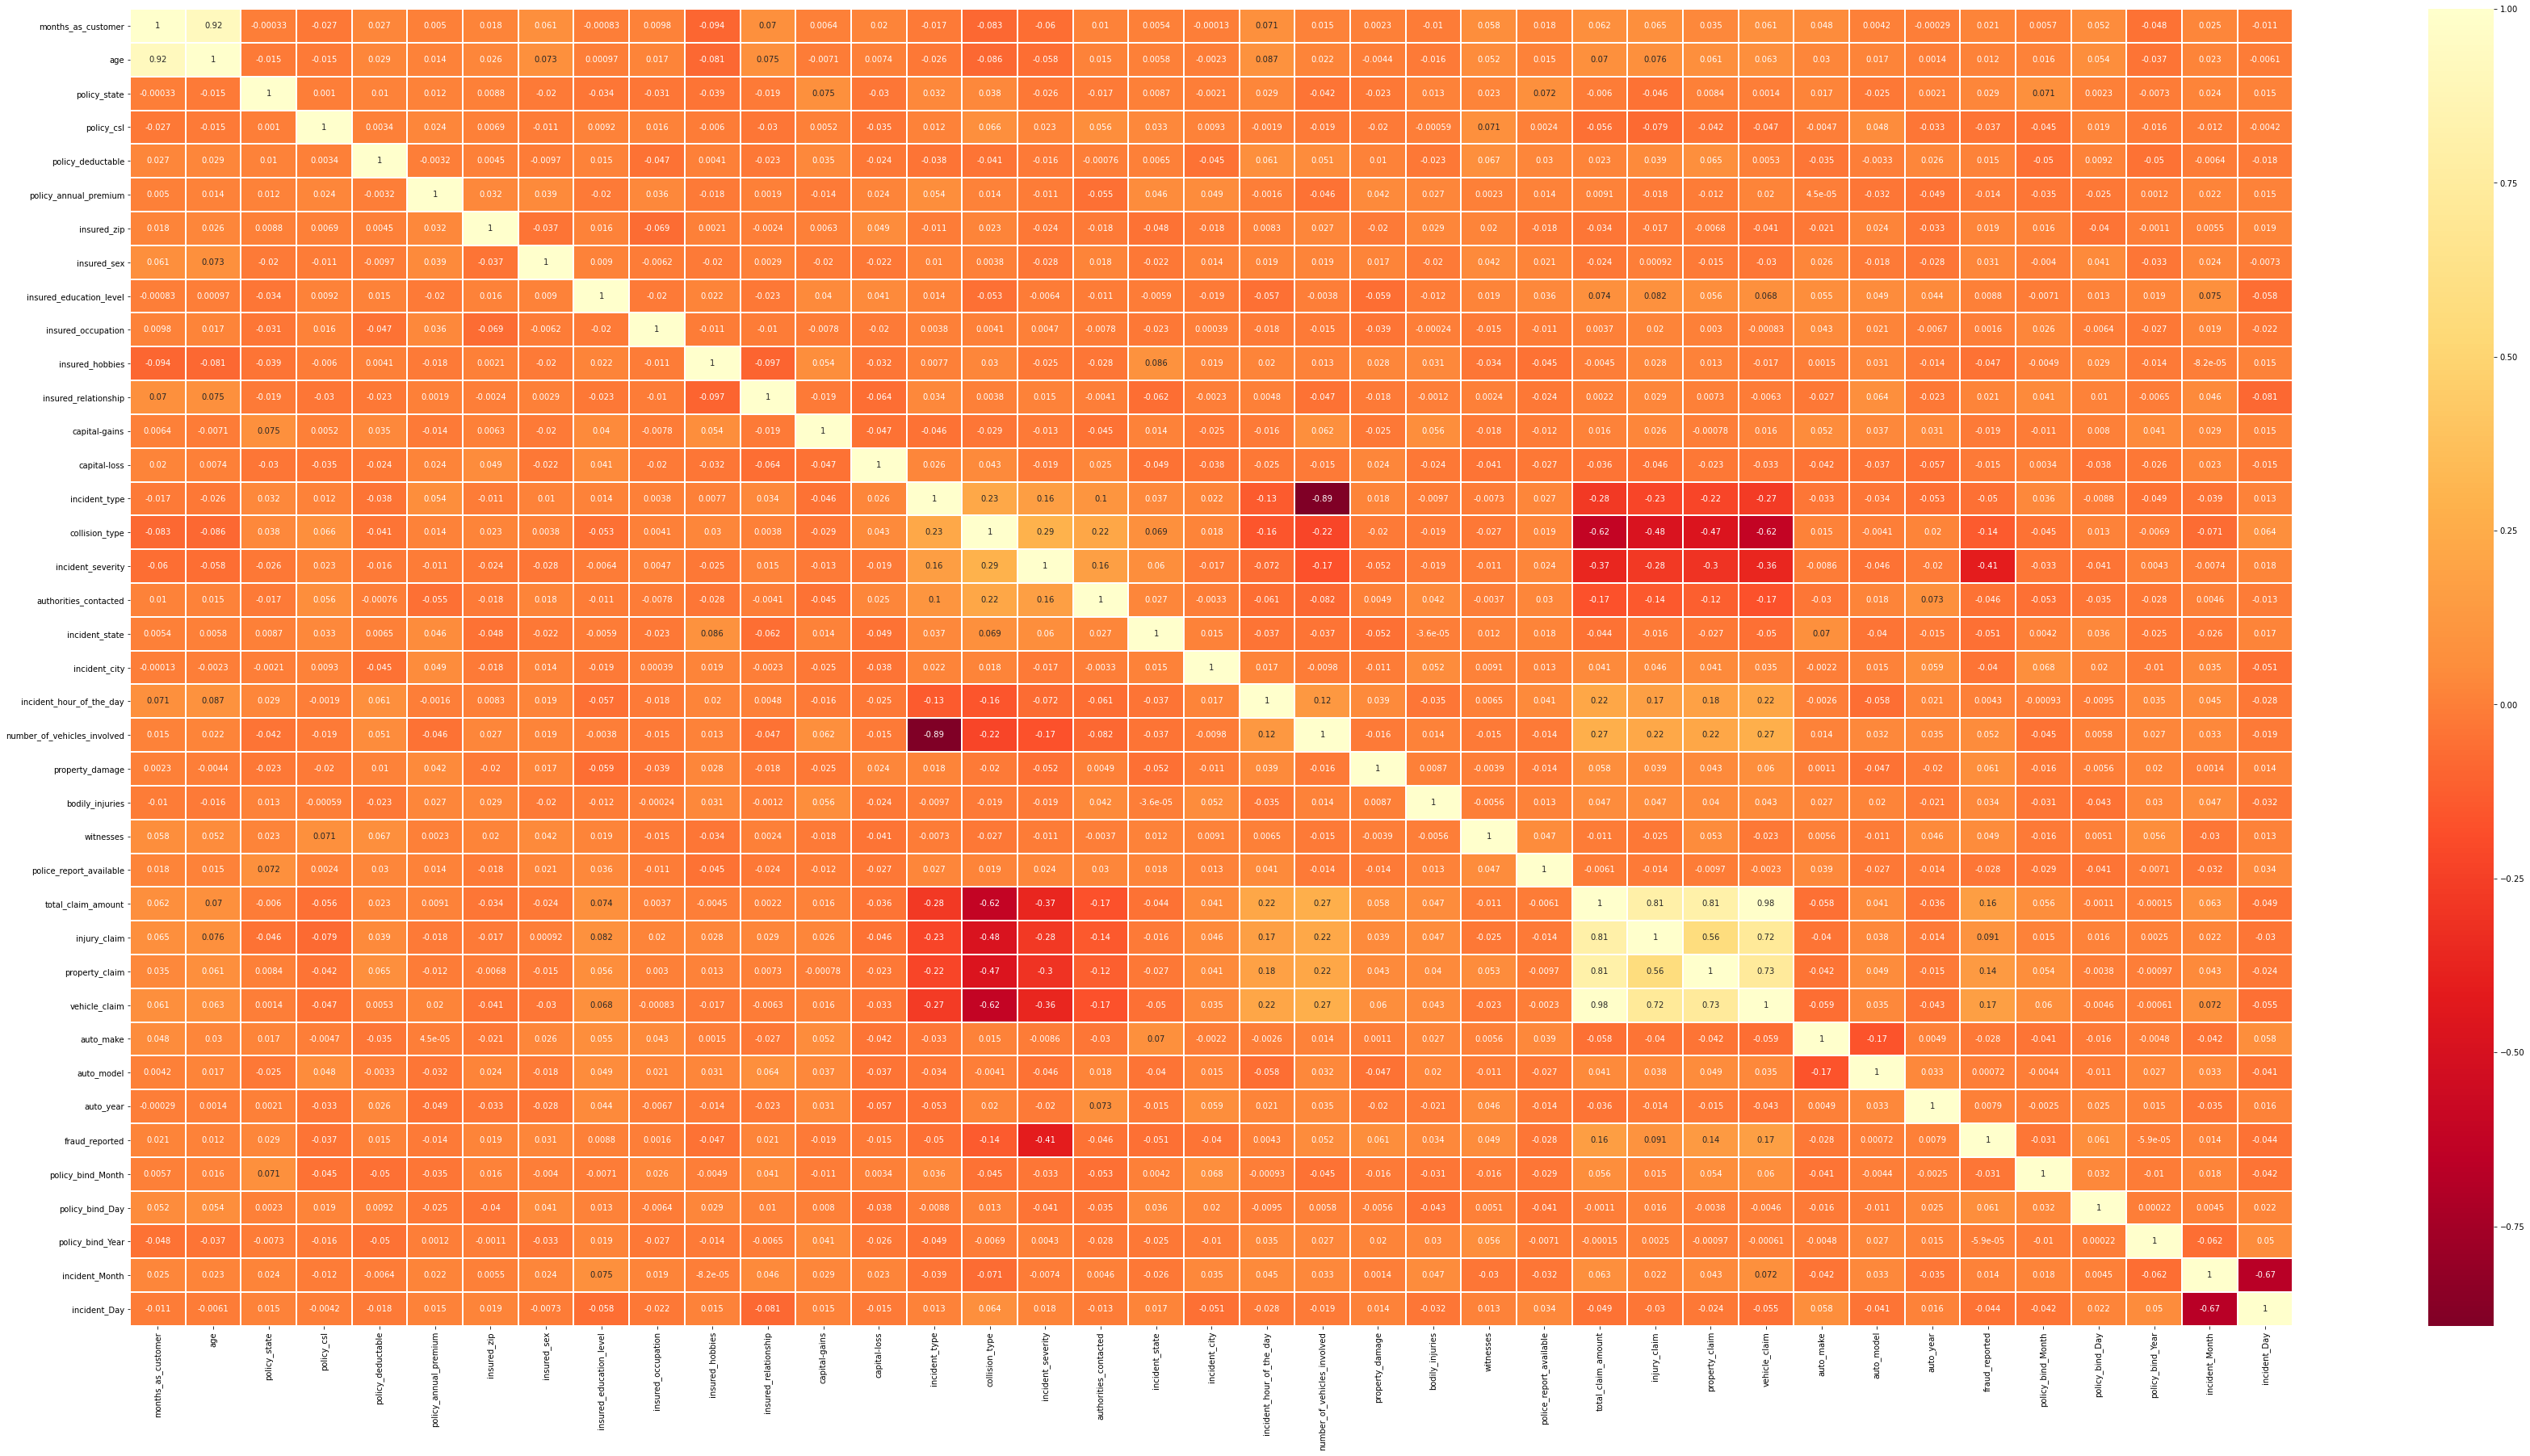

In [160]:
plt.figure(figsize=(60,30))
sns.heatmap(datacor,cmap='YlOrRd_r',linewidth=1,annot=True)

As it is showing entire correlation of dataset. we can visualize correlation of all columns vs labe columns to have good insights

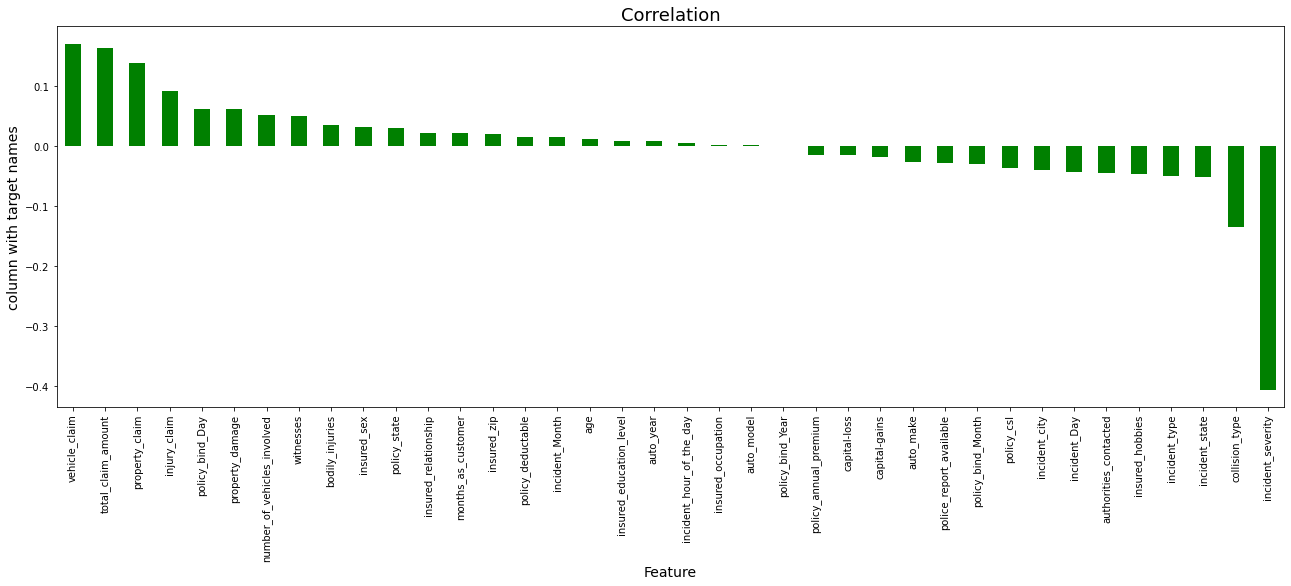

In [161]:
#plotting correlation between all feature columns vs target variable
plt.figure(figsize=(22,7))
data.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='green')
plt.xlabel("Feature",fontsize=14)
plt.ylabel("column with target names",fontsize=14)
plt.title("Correlation",fontsize=18)
plt.show()

we can see that Vehicle_claim has highly positive correlation and incident_severity has highly negative correlation with labelcolumn. for sure we can drop policy_bind_year. Let us do other visualization and will do PCA for dimension reductionality

we can see correlation between all the columns from the heatmap

# Distribution of data : Skewness

In [162]:
len(cont_col)

21

In [163]:
cont_col   #continous data

['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year',
 'policy_bind_Month',
 'policy_bind_Day',
 'policy_bind_Year',
 'incident_Month',
 'incident_Day']

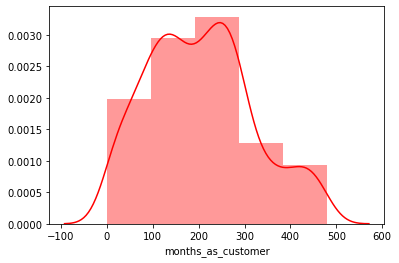

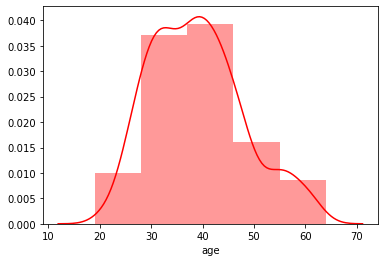

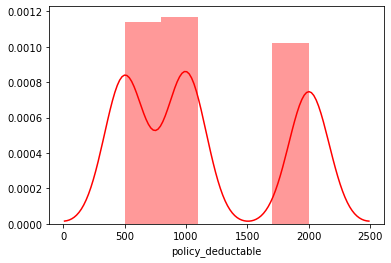

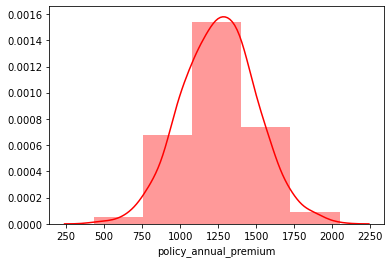

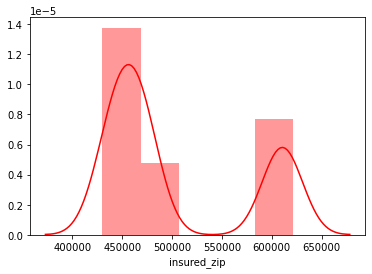

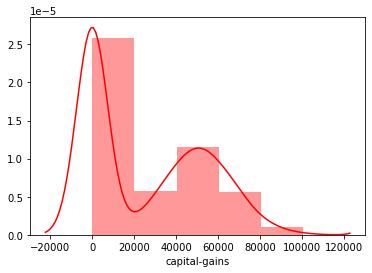

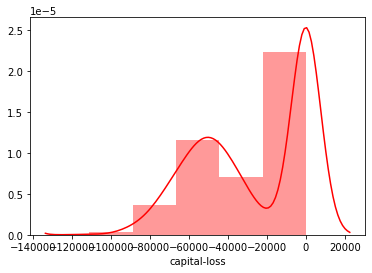

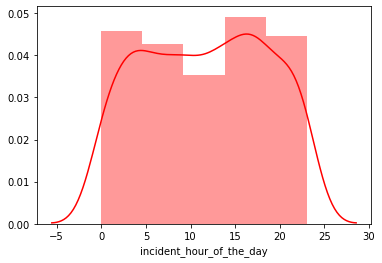

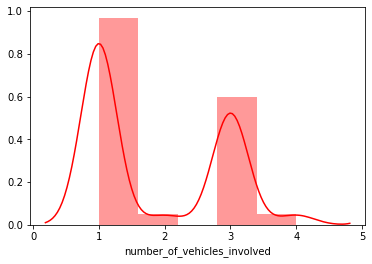

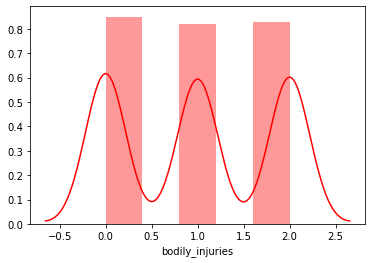

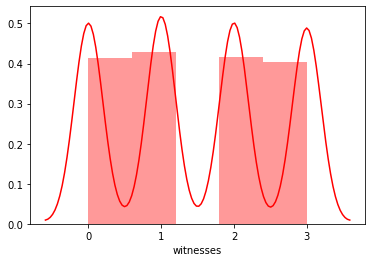

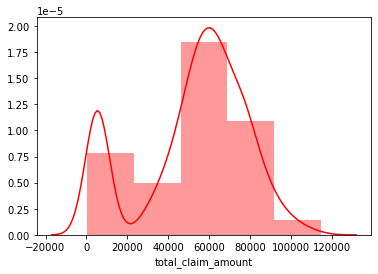

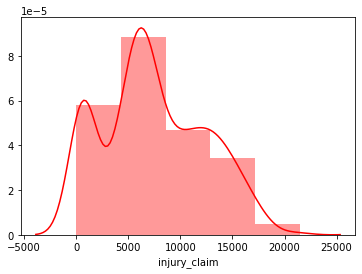

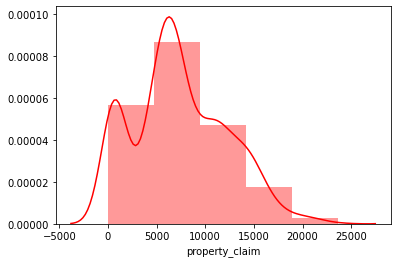

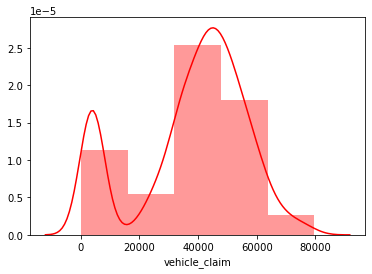

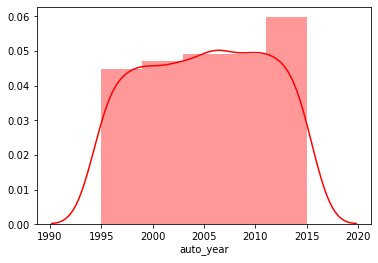

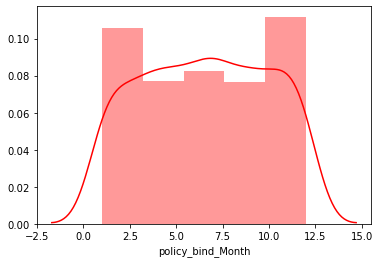

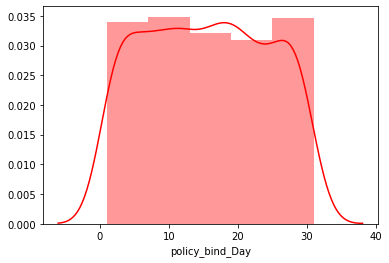

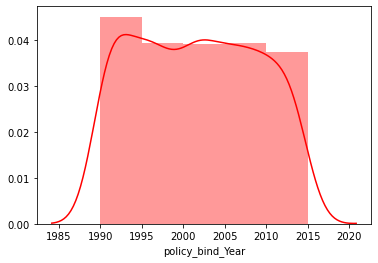

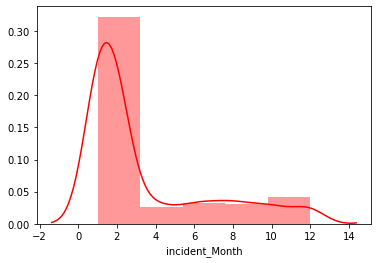

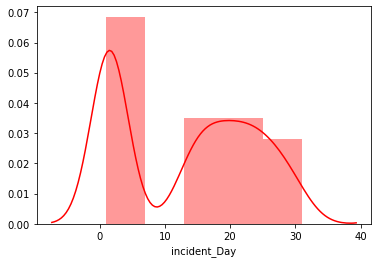

In [164]:
#checking skewness through visulaization for columns individually

def dtp(a):
    plt.figure()
    sns.distplot(data[cont_col[a]],color='red',bins=5)
    
for i in range(0,21):
    dtp(i)

All the continous data seems to be normally distributed. We will check skewness value and correct if necessary

# Detecting Outliers

In [165]:
cont_col

['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year',
 'policy_bind_Month',
 'policy_bind_Day',
 'policy_bind_Year',
 'incident_Month',
 'incident_Day']

In [166]:
cont_col=['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year',
 'policy_bind_Month',
 'policy_bind_Day',
 'policy_bind_Year',
 'incident_Month',
 'incident_Day']

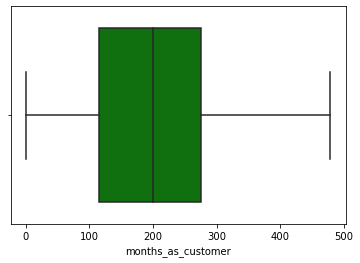

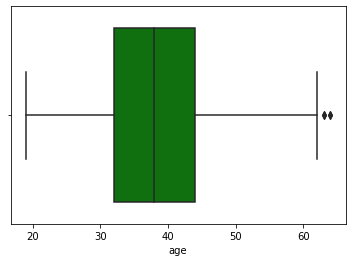

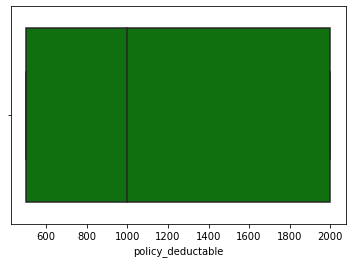

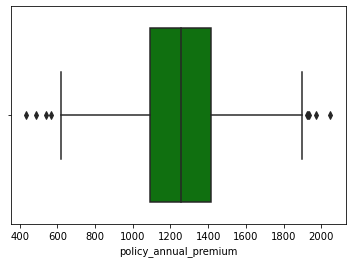

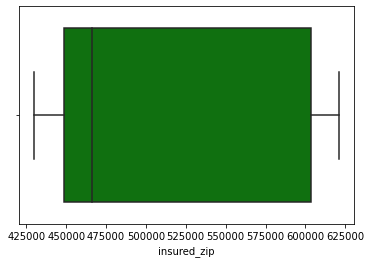

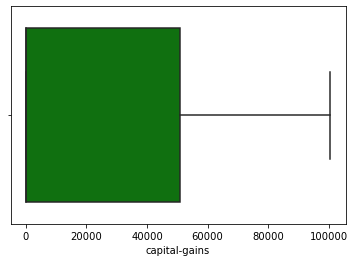

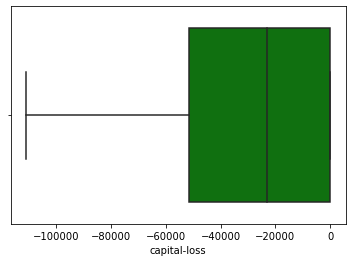

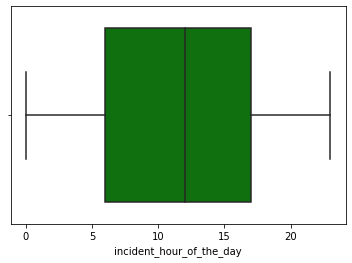

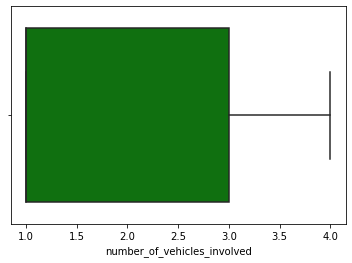

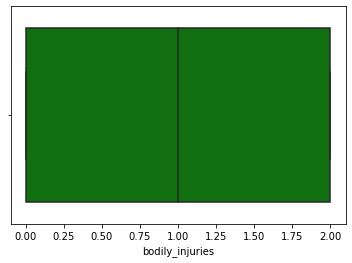

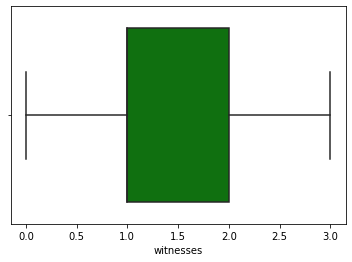

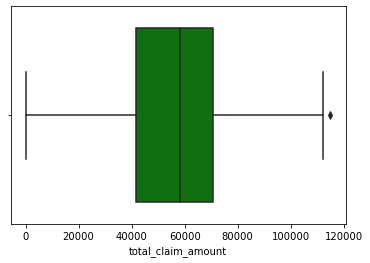

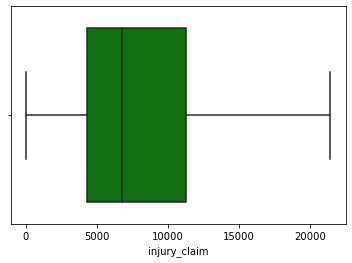

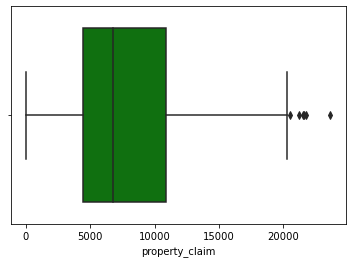

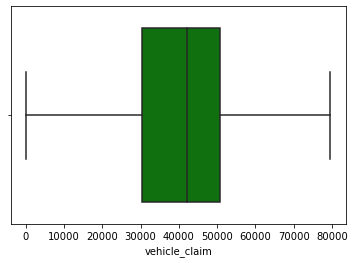

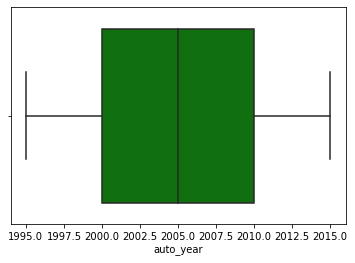

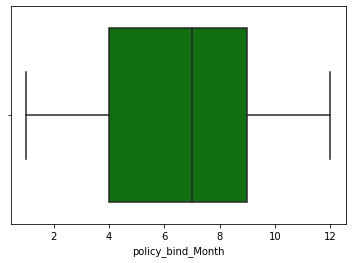

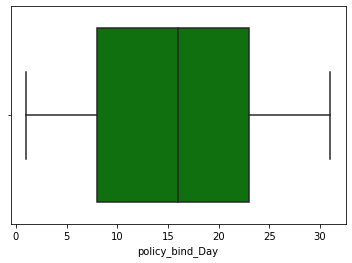

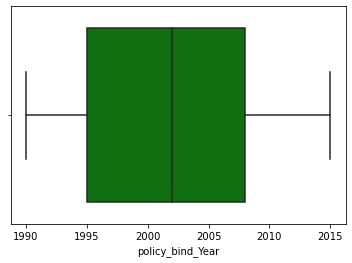

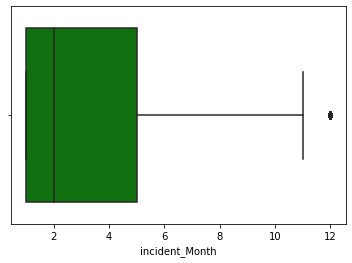

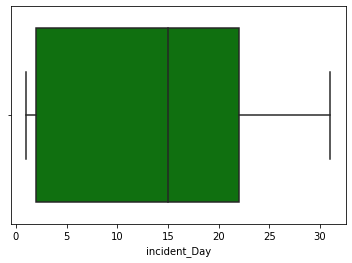

In [167]:
def bxplt(a):
    plt.figure()
    sns.boxplot(data[cont_col[a]],color='green')
    
for i in range(0,21):
    bxplt(i)

In [168]:
data['umbrella_limit']=data['umbrella_limit'].astype(int)

In [169]:
data['umbrella_limit'].dtype

dtype('int32')

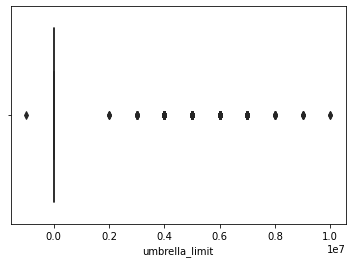

In [170]:
plt.figure()
sns.boxplot(data['umbrella_limit'],color='green')

we can see outliers in some of the columns like policy annual premium and property claim. we need not remove this outliers as it is near the whisker line


Let us have a overall visualization of spread of data using pairplot

# Checking distribution relationship

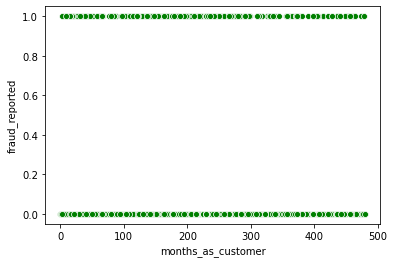

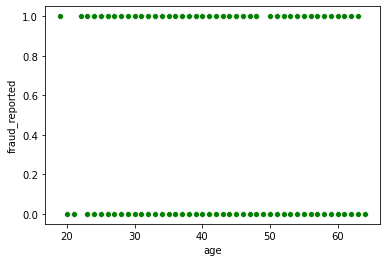

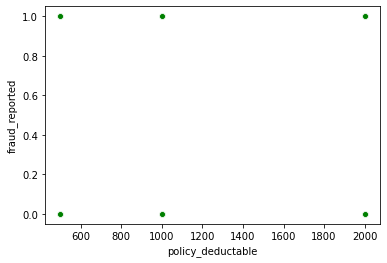

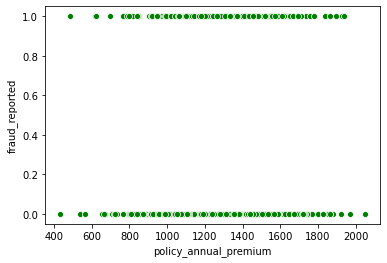

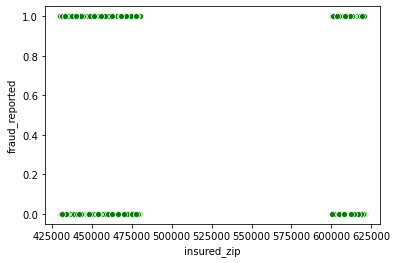

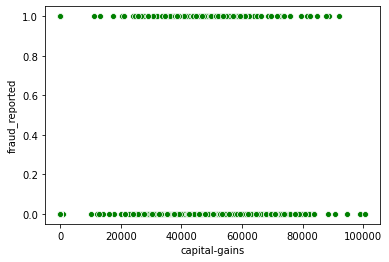

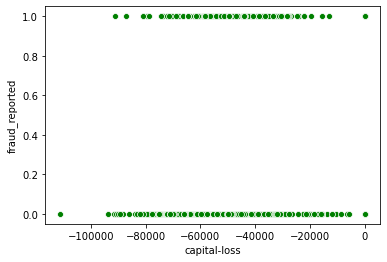

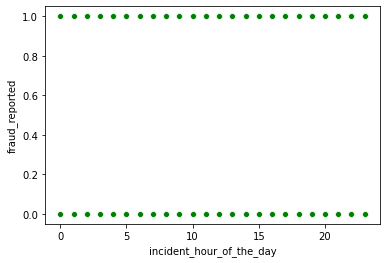

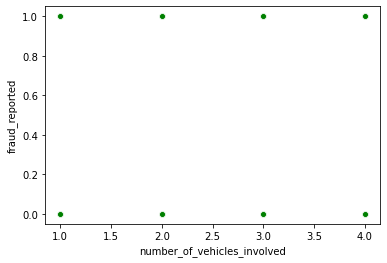

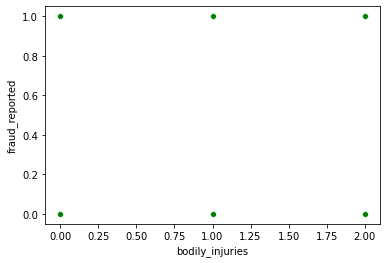

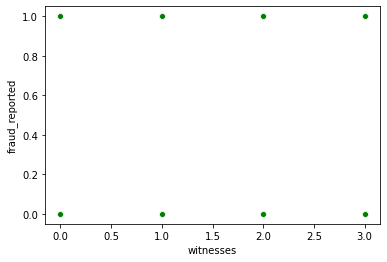

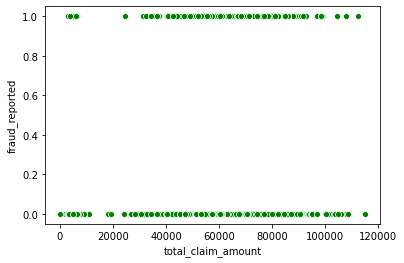

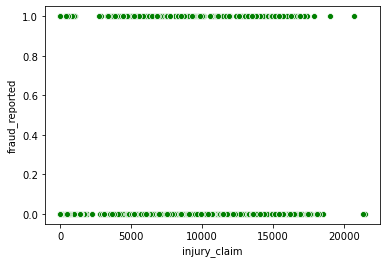

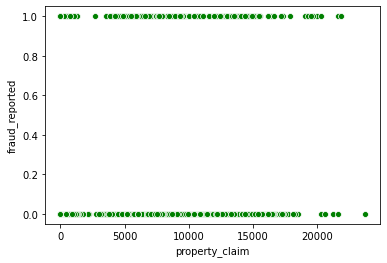

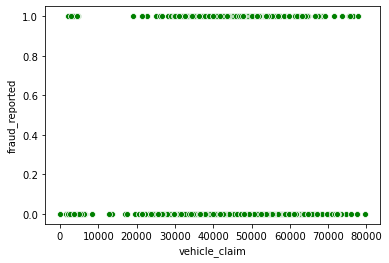

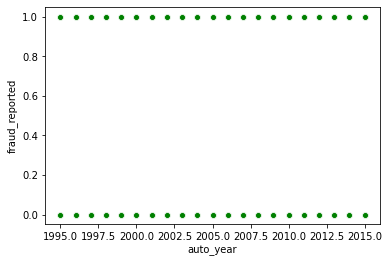

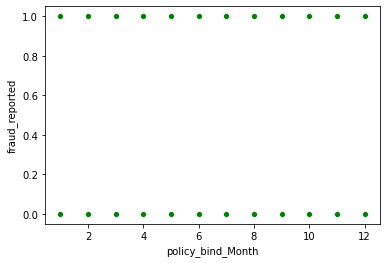

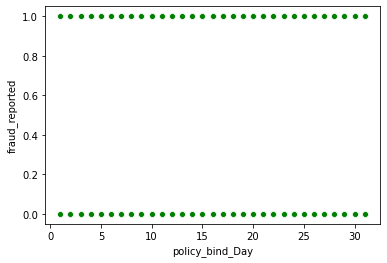

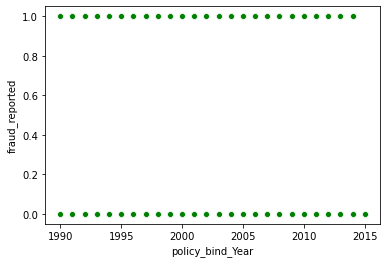

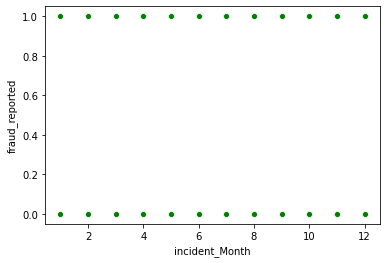

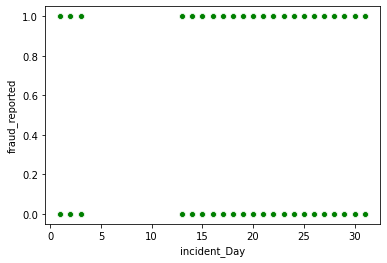

In [171]:
#relationship for each feature name with the output (continous data)min temp

def dtp(a):
    plt.figure()
    sns.scatterplot(x=data[cont_col[a]],y=data['fraud_reported'],color='green')
    
for i in range(0,21):
    dtp(i)

scattering of data on entire dataset to the label column

No columns dropped as of now. we will drop further if necessary after checking multicollinearity

We need not remove outliers. As we didn't find any removable outliers in any of the continous data

# Skewness Removal

In [172]:
#let us check skewness for each continous data
for i in cont_col:
    print(i)
    print(data[i].skew())

months_as_customer
0.3621768477780205
age
0.47898804709224163
policy_deductable
0.4778872137362794
policy_annual_premium
0.004401994526610823
insured_zip
0.8165539258839357
capital-gains
0.4788502295807907
capital-loss
-0.39147194299389343
incident_hour_of_the_day
-0.03558446643823673
number_of_vehicles_involved
0.502664087487584
bodily_injuries
0.014777103511243209
witnesses
0.019636419856529662
total_claim_amount
-0.594581988510234
injury_claim
0.26481087847181833
property_claim
0.3781687764308289
vehicle_claim
-0.6210979312228687
auto_year
-0.04828880711387396
policy_bind_Month
-0.029320719279913556
policy_bind_Day
0.02437171983497393
policy_bind_Year
0.052510955982057385
incident_Month
1.375894229072849
incident_Day
0.05911110841175971


In [173]:
#removing skewness by transformation method
from sklearn.preprocessing import PowerTransformer
data['incident_Month']=PowerTransformer().fit_transform(data['incident_Month'].values.reshape(-1,1))
data['vehicle_claim']=PowerTransformer().fit_transform(data['vehicle_claim'].values.reshape(-1,1))
data['total_claim_amount']=PowerTransformer().fit_transform(data['total_claim_amount'].values.reshape(-1,1))

In [174]:
for i in cont_col:
    print(i)
    print(data[i].skew())

months_as_customer
0.3621768477780205
age
0.47898804709224163
policy_deductable
0.4778872137362794
policy_annual_premium
0.004401994526610823
insured_zip
0.8165539258839357
capital-gains
0.4788502295807907
capital-loss
-0.39147194299389343
incident_hour_of_the_day
-0.03558446643823673
number_of_vehicles_involved
0.502664087487584
bodily_injuries
0.014777103511243209
witnesses
0.019636419856529662
total_claim_amount
-0.5103540202829425
injury_claim
0.26481087847181833
property_claim
0.3781687764308289
vehicle_claim
-0.5227176054445951
auto_year
-0.04828880711387396
policy_bind_Month
-0.029320719279913556
policy_bind_Day
0.02437171983497393
policy_bind_Year
0.052510955982057385
incident_Month
0.3064677749247275
incident_Day
0.05911110841175971


In [175]:
data.isnull().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_cl

skewness removed succesfully

In [210]:
#initialising x and y

x=data.drop('fraud_reported',axis=1)
y=data['fraud_reported']

In [211]:
#checking multicollinearity 
from statsmodels.stats.outliers_influence import variance_inflation_factor

m=x.copy()
SC=StandardScaler()
X=SC.fit_transform(m)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['features']=m.columns

In [212]:
vif.round(1)

,vif,features
0,6.9,months_as_customer
1,6.9,age
2,1.0,policy_state
3,1.0,policy_csl
4,1.0,policy_deductable
5,1.0,policy_annual_premium
6,1.0,umbrella_limit
7,1.0,insured_zip
8,1.0,insured_sex
9,1.0,insured_education_level


months_as_customer,age,incident_type,number_of_vehicles_involved,total_claim_amount,injury_claim,property_claim,vehicle_claim. Based on correlation with target variable we are going to drop

In [213]:
#dropping zero correlation and less correlated multicollinear data
x.drop("policy_bind_Year",axis=1,inplace=True)
x.drop("age",axis=1,inplace=True)

In [214]:
#dropping data due to multicollinearity
x.drop("total_claim_amount",axis=1,inplace=True)

In [215]:
#dropping data due to multicollinearity
x.drop("incident_type",axis=1,inplace=True)

In [216]:
#checking multicollinearity after dropping multicollinear columns
from statsmodels.stats.outliers_influence import variance_inflation_factor

m=x.copy()
SC=StandardScaler()
X=SC.fit_transform(m)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['features']=m.columns

In [217]:
vif.round(1)

,vif,features
0,1.0,months_as_customer
1,1.0,policy_state
2,1.0,policy_csl
3,1.0,policy_deductable
4,1.0,policy_annual_premium
5,1.0,umbrella_limit
6,1.0,insured_zip
7,1.0,insured_sex
8,1.0,insured_education_level
9,1.0,insured_occupation


All the vif>5. Therefore we have no multicollinear column

All the data cleaning process is done. The dataset is ready for modelling

----------------------------------------------------END OF EDA----------------------------------------------------------------------------------------------------

# Model Building

In [218]:
#scaling data as it contains both int and float
SC=StandardScaler()
X=SC.fit_transform(x)
x=pd.DataFrame(X,columns=x.columns)

In [219]:
x

,months_as_customer,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,policy_bind_Month,policy_bind_Day,incident_Month,incident_Day
0,1.078140,1.187173,0.060937,-0.222383,0.616705,-0.479476,-0.489529,1.076953,0.530931,-1.158316,1.281737,-1.437957,1.011331,0.953851,0.593292,-1.260614,1.196963,0.351762,-0.962196,-0.956261,-0.823865,1.296313,0.009759,0.461838,1.270313,-0.189283,1.165505,0.753697,0.856466,-1.645743,-0.183440,1.015026,0.175451,-1.100457,1.141603
1,0.208995,-0.016856,0.060937,1.412784,-0.242521,1.697980,-0.461008,1.076953,0.530931,-0.162558,0.929078,-0.247595,-0.901927,0.953851,1.547138,-0.195906,1.196963,0.815829,0.995476,-0.524475,-0.823865,0.045046,-1.210174,-1.338700,-1.198712,-1.363822,-1.372696,-1.786629,0.360539,-0.657470,0.315491,-0.164894,1.305938,-1.100457,0.758386
2,-0.608002,1.187173,-1.182668,1.412784,0.642233,1.697980,-0.984885,-0.928546,1.557877,1.082141,-1.363201,0.347586,0.358023,0.953851,-0.360554,-0.195906,1.196963,-1.040437,-0.962196,-0.668404,1.140056,-1.206222,1.229693,1.362107,0.035801,0.054644,-0.736072,-0.820881,-0.631315,0.959702,0.315491,-0.164894,-0.728938,-0.025412,0.854190
3,0.452355,-1.220886,0.060937,1.412784,0.652886,2.133471,1.491682,-0.928546,1.557877,-1.407256,-1.363201,0.942766,0.853388,-1.267577,-1.314400,-1.260614,1.196963,-0.576371,-1.451614,-0.956261,-0.823865,0.045046,0.009759,0.461838,0.035801,-0.224130,-0.219722,0.677602,-0.879279,1.319074,1.479664,-0.459874,1.079841,1.553521,-1.157698
4,0.208995,-1.220886,1.304542,-0.222383,1.341980,2.133471,1.527808,1.076953,-1.522961,1.082141,-1.363201,0.942766,1.467210,-0.683741,1.547138,-0.195906,-0.109052,-1.040437,-1.451614,1.202666,-0.823865,-1.206222,-1.210174,-0.438431,0.035801,-1.257232,-1.399654,-1.740038,-1.623169,1.049545,0.648112,-0.164894,-1.068084,-0.025412,0.375169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,1.187173,1.304542,-0.222383,0.222884,-0.479476,-0.975717,-0.928546,1.044404,-1.158316,0.576420,0.942766,-0.901927,0.953851,-1.314400,-0.195906,-0.762060,-1.504504,0.506058,1.202666,-0.823865,1.296313,-1.210174,-0.438431,-1.198712,2.051155,0.273817,1.259186,-0.135388,-1.196528,0.149180,0.130086,0.062403,-0.025412,0.854190
996,0.704407,-1.220886,-1.182668,-0.222383,0.739141,-0.479476,1.492519,-0.928546,1.557877,0.584261,1.281737,1.537947,1.643100,0.953851,-0.360554,-1.260614,-0.762060,0.351762,0.016640,1.634452,-0.823865,1.296313,1.229693,1.362107,-1.198712,2.182342,2.214794,1.904757,1.600357,0.780016,1.645974,-0.459874,-1.633327,-1.100457,1.045799
997,-0.642767,1.187173,0.060937,-1.039966,0.520739,0.826998,-0.815138,-0.928546,1.044404,-1.407256,-1.186872,-0.247595,0.358023,0.953851,0.593292,-0.195906,1.196963,-1.504504,-1.451614,-1.100189,1.140056,0.045046,1.229693,1.362107,1.270313,0.013648,0.020826,0.777232,1.104430,-0.028570,-1.513924,-1.344813,0.175451,-1.100457,0.949994
998,2.208028,-1.220886,1.304542,1.412784,0.411866,1.697980,-0.830250,1.076953,-1.522961,-0.411497,-1.715859,1.537947,-0.901927,0.953851,-0.360554,-1.260614,0.543955,-1.040437,-1.451614,-1.388046,-0.823865,0.045046,-1.210174,-0.438431,1.270313,-0.453708,-0.451976,-0.104258,-1.375206,-1.286371,-1.181303,1.310006,0.288500,-0.025412,1.237407


In [220]:
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int32

In [221]:
x.isnull().sum()

months_as_customer             0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make                      0
auto_model                     0
auto_year 

In [222]:
x.shape

(1000, 35)

so we have 1000 rows and 35 columns in independent variables

In [223]:
y.shape

(1000,)

In [225]:
y.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

In [226]:
#finding best random_state
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on random_state ",maxRS)

Best accuracy is  0.8181818181818182  on random_state  97


In [227]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=97)

In [228]:
x_train.shape

(670, 35)

In [229]:
y_train.shape

(670,)

In [230]:
x_test.shape

(330, 35)

In [231]:
# different algorithm going to use for classifier

lg=LogisticRegression(multi_class='multinomial')
gnb=GaussianNB()
sv=SVC()
dtc=DecisionTreeClassifier()
rf=RandomForestClassifier(n_estimators=100)
ad=AdaBoostClassifier(n_estimators=100)
gd=GradientBoostingClassifier()

In [232]:
#code for Training and Prediction 

def eval(x):
    mod=x
    print(mod)
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    
    print("accuracy score is :",accuracy_score(y_test,pred))
    print("\n")
    print("Confusion Matrix : \n",confusion_matrix(y_test,pred))
    print("\n")
    print("Classification Report  : \n",classification_report(y_test,pred))

In [233]:
#calling function to run model

eval(lg)

LogisticRegression(multi_class='multinomial')
accuracy score is : 0.8181818181818182


Confusion Matrix : 
 [[245  13]
 [ 47  25]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.84      0.95      0.89       258
           1       0.66      0.35      0.45        72

    accuracy                           0.82       330
   macro avg       0.75      0.65      0.67       330
weighted avg       0.80      0.82      0.80       330



Logistic Regression has an accuracy of 81.81%

In [234]:
eval(gnb)

GaussianNB()
accuracy score is : 0.7575757575757576


Confusion Matrix : 
 [[210  48]
 [ 32  40]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       258
           1       0.45      0.56      0.50        72

    accuracy                           0.76       330
   macro avg       0.66      0.68      0.67       330
weighted avg       0.78      0.76      0.77       330



GuassianNB has an accuracy of 75.75%

In [236]:
eval(sv)

SVC()
accuracy score is : 0.7818181818181819


Confusion Matrix : 
 [[255   3]
 [ 69   3]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.79      0.99      0.88       258
           1       0.50      0.04      0.08        72

    accuracy                           0.78       330
   macro avg       0.64      0.52      0.48       330
weighted avg       0.72      0.78      0.70       330



SVC has an accuracy of 78.18%

In [238]:
eval(dtc)

DecisionTreeClassifier()
accuracy score is : 0.793939393939394


Confusion Matrix : 
 [[225  33]
 [ 35  37]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       258
           1       0.53      0.51      0.52        72

    accuracy                           0.79       330
   macro avg       0.70      0.69      0.69       330
weighted avg       0.79      0.79      0.79       330



dtc has an accuracy of 79.39

In [239]:
eval(rf)

RandomForestClassifier()
accuracy score is : 0.793939393939394


Confusion Matrix : 
 [[248  10]
 [ 58  14]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.81      0.96      0.88       258
           1       0.58      0.19      0.29        72

    accuracy                           0.79       330
   macro avg       0.70      0.58      0.59       330
weighted avg       0.76      0.79      0.75       330



Random Forest Classifier has an accuracy of 79.39%

In [240]:
eval(ad)

AdaBoostClassifier(n_estimators=100)
accuracy score is : 0.8333333333333334


Confusion Matrix : 
 [[238  20]
 [ 35  37]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.87      0.92      0.90       258
           1       0.65      0.51      0.57        72

    accuracy                           0.83       330
   macro avg       0.76      0.72      0.74       330
weighted avg       0.82      0.83      0.83       330



Adaboost Classifier has an accuracy of 83.33%

In [241]:
eval(gd)

GradientBoostingClassifier()
accuracy score is : 0.8484848484848485


Confusion Matrix : 
 [[234  24]
 [ 26  46]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.90      0.91      0.90       258
           1       0.66      0.64      0.65        72

    accuracy                           0.85       330
   macro avg       0.78      0.77      0.78       330
weighted avg       0.85      0.85      0.85       330



Gradient Boosting classifier has an accuracy of 84.84%

# Gradientboostingclassifier is giving good accuracy of 84.84%. Let us finalize the model using Cross validation score

# Cross_Validation

In [242]:
model=[lg,gnb,sv,dtc,rf,ad,gd]

for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print(m,"Cross val score is ",score)
    print("mean is ",score.mean())

LogisticRegression(multi_class='multinomial') Cross val score is  [0.765 0.79  0.735 0.785 0.79 ]
mean is  0.773
GaussianNB() Cross val score is  [0.775 0.74  0.69  0.775 0.78 ]
mean is  0.752
SVC() Cross val score is  [0.77  0.735 0.735 0.765 0.75 ]
mean is  0.751
DecisionTreeClassifier() Cross val score is  [0.78  0.76  0.76  0.765 0.8  ]
mean is  0.773
RandomForestClassifier() Cross val score is  [0.745 0.76  0.77  0.79  0.78 ]
mean is  0.7689999999999999
AdaBoostClassifier(n_estimators=100) Cross val score is  [0.775 0.775 0.745 0.835 0.845]
mean is  0.7949999999999999
GradientBoostingClassifier() Cross val score is  [0.8   0.805 0.785 0.86  0.865]
mean is  0.8230000000000001


By comparing both cross validation accuracy and actual accuracy. It is found that Gradient Boosting Classifier is the best model. Since it is nearly unbalanced dataset we if we take f1 score. It is giving 90% accuracy

# GradientBoostingClassifier model is the best model with 84.84 % accuracy

we will try to improve accuracy by hypertuning

In [253]:
gd.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [263]:
from sklearn.model_selection import RandomizedSearchCV

rand_params = parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }
rand_search = RandomizedSearchCV(gd,param_distributions=rand_params, cv = 10,n_jobs=-1)

In [264]:
rand_search.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse', 'mae'],
                                        'learning_rate': [0.01, 0.025, 0.05,
                                                          0.075, 0.1, 0.15,
                                                          0.2],
                                        'loss': ['deviance'],
                                        'max_depth': [3, 5, 8],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': array([0.1       , 0.13636364, 0.17272727, 0.20909091, 0.24545455,
       0.28181818, 0.31818182, 0.35454545, 0.39090909, 0.42727273,
       0.46363636, 0.5       ]),
                                        'min_samples_split': array([0.1       , 0.13636364, 0.17272727, 0.20909091, 0.24545455,
       0.28181818, 0.31818182, 0.35454545, 0.39090909, 0.42727273,
      

In [265]:
rand_search.best_params_

{'subsample': 0.9,
 'n_estimators': 10,
 'min_samples_split': 0.5,
 'min_samples_leaf': 0.13636363636363638,
 'max_features': 'sqrt',
 'max_depth': 3,
 'loss': 'deviance',
 'learning_rate': 0.2,
 'criterion': 'mae'}

In [269]:
gradboost = GradientBoostingClassifier(subsample=0.9,n_estimators=10,learning_rate=0.2,min_samples_split=0.5,max_features='sqrt',max_depth=3,loss='deviance',criterion='mae')
gradboost.fit(x_train, y_train)

GradientBoostingClassifier(criterion='mae', learning_rate=0.2,
                           max_features='sqrt', min_samples_split=0.5,
                           n_estimators=10, subsample=0.9)

In [270]:
eval(gradboost)

GradientBoostingClassifier(criterion='mae', learning_rate=0.2,
                           max_features='sqrt', min_samples_split=0.5,
                           n_estimators=10, subsample=0.9)
accuracy score is : 0.793939393939394


Confusion Matrix : 
 [[256   2]
 [ 66   6]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.80      0.99      0.88       258
           1       0.75      0.08      0.15        72

    accuracy                           0.79       330
   macro avg       0.77      0.54      0.52       330
weighted avg       0.79      0.79      0.72       330



In [271]:
gradboost.score(x_train,y_train)

0.7611940298507462

In [272]:
gradboost.score(x_test,y_test)

0.793939393939394

In [273]:
score=cross_val_score(gradboost,x,y,cv=5)
print(gradboost,"Cross val score is ",score)
print("mean is ",score.mean())

GradientBoostingClassifier(criterion='mae', learning_rate=0.2,
                           max_features='sqrt', min_samples_split=0.5,
                           n_estimators=10, subsample=0.9) Cross val score is  [0.755 0.745 0.765 0.755 0.825]
mean is  0.7689999999999999


In [274]:
gd.score(x_train,y_train)

0.9865671641791045

In [275]:
gd.score(x_test,y_test)

0.8484848484848485

Therefore it is not a overfitted model



The hyper parameter tuning of gradient boosting classifier gives actual accuracy of 79.39 % and cross val of 76.89 %. Since there is no accuracy increase for hypertuned parameter. The default model of Gradient Boosting classifier algorithm is selected for final output. Since Hyperparamter tuning taking a lot of time, it is performed only for top model to see whether it is improving the accuracy.

Gradient Boosting Classifier with true accuracy 84.84% is selected as final model for execution

# AUC_ROC CURVE

In [276]:
#code for AUC_ROC CURVE

from sklearn.metrics import roc_auc_score 
from sklearn.metrics import plot_roc_curve 

def auc_roc(mod):
    plot_roc_curve(mod,x_test,y_test)
    plt.title('Receiver operating Characteristics')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

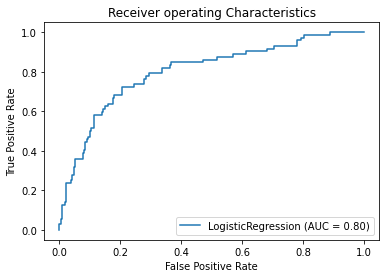

In [277]:
auc_roc(lg)

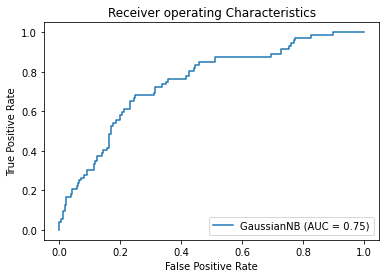

In [278]:
auc_roc(gnb)

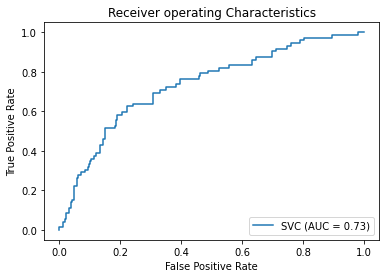

In [279]:
auc_roc(sv)

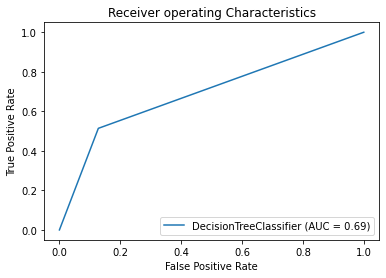

In [280]:
auc_roc(dtc)

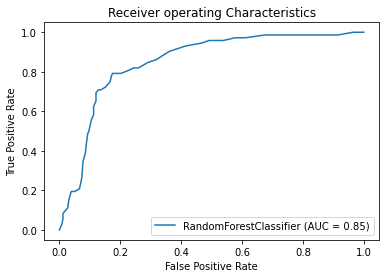

In [281]:
auc_roc(rf)

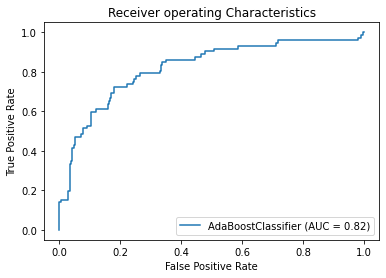

In [282]:
auc_roc(ad)

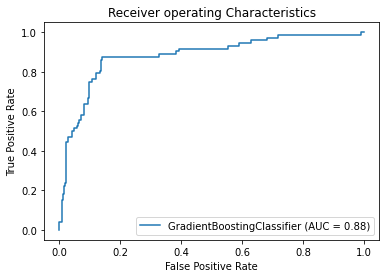

In [283]:
auc_roc(gd)

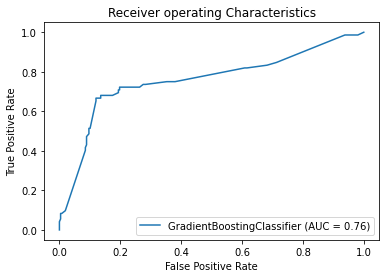

In [284]:
auc_roc(gradboost)

we can see that the Area under curve is 88% for GradientBoostingClassifier model which is high. So we have selected the right algorithm

The area under curve is high for GradientBoostingClassifier with AUC score of 0.88. That means 88% of area under curve is covered in this model.

# GradientBoostingClassifier  Model is the final model with an accuracy of 84.84%

# Conclusion

In [285]:
#saving the file for future use
joblib.dump(gd,"gd_insurancefraud_prediction.obj")

['gd_insurancefraud_prediction.obj']

In [286]:
#Lets Check loading the file 

insurancefraud_prediction=joblib.load("gd_insurancefraud_prediction.obj")

In [287]:
insurancefraud_prediction.score(x_test,y_test)

0.8484848484848485

In [288]:
pred=gd.predict(x_test)
Conclusion=pd.DataFrame([insurancefraud_prediction.predict(x_test)[:],pred[:]],index=["Predicted","Original"])

In [289]:
Conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329
Predicted,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
Original,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


we can see it is giving exact data as result. The model is working well

The datas predicted are perfectly matching. The jobfile created is working well almost giving good accuracy.

After Training and Testing seven algorithm model. The best accuracy model was determined as GradientBoostingClassifier with 84.84% true accuracy after all the data cleaning, pre-processing, training and prediction as well as evaluation phase.

insurance fraud yes or no prediction can be easily predicted now through this model



# Model Created Succesfully